# Predict Leaf Disease Notebook

This notebook runs the Python script to predict leaf diseases using a trained model.

In [8]:
import argparse
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Load Model From Zip

In [9]:
def load_model_from_zip(zip_path, model_filename):
    """
    Extracts the .h5 file from the zip, loads it with Keras, then returns the model.
    """
    with zipfile.ZipFile(zip_path, 'r') as zf:
        model_basename = os.path.basename(model_filename)
        zf.extract(model_basename, path='.')
    model = tf.keras.models.load_model(model_basename)
    return model

## Predict Image

In [10]:
def predict_image(model, img_path):
    """
    Preprocess the image, run model prediction, and return the predicted class and its confidence.
    """
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array)
    class_idx = int(np.argmax(preds[0]))
    confidence = float(preds[0][class_idx])
    return class_idx, confidence

## Main Function

In [11]:
def main():
    image_path = 'image1.JPG'
    model_zip = 'trained_model_and_augmented.zip'
    model_file = 'trained_leaf_disease_model.h5'

    if not os.path.isfile(image_path):
        print(f'Error: {image_path} is not a valid file.')
        return

    if not os.path.isfile(model_zip):
        print(f'Error: {model_zip} does not exist.')
        return

    model = load_model_from_zip(model_zip, model_file)
    print('Model loaded successfully.')

    class_idx, confidence = predict_image(model, image_path)

    class_names = [
        'apple_apple_scab',
        'apple_black_rot',
        'apple_cedar_apple_rust',
        'apple_healthy'
    ]

    predicted_class = class_names[class_idx] if class_idx < len(class_names) else 'Unknown'

    img_original = load_img(image_path)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(img_original)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    resized_img = load_img(image_path, target_size=(224, 224))
    axes[1].imshow(resized_img)
    axes[1].set_title(f'Transformed (Resized)\nPred: {predicted_class}\nConf: {confidence:.2f}')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

## Run Main

Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


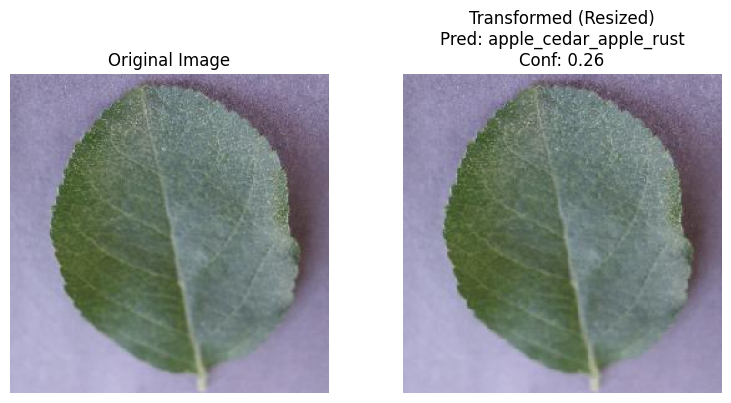

In [12]:
main()